<a href="https://colab.research.google.com/github/AlejoRendon095/Matematicas-aplicadas-I/blob/main/proyecto_final_matemticas_aplicadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = "Green">$Red$ $Neuronal$ $Para$ $Prediccion$ $De$ $Precio$ $De$ $Las$ $Acciones$

<img src= https://www.ibm.com/analytics/mx/es/business/financial-performance-management/images@@Financial-Performance-Leadspace-Accounting-Papers-1000x700.gif width="300" height="200" align="center">

#<font color = "Green">$Introduccion$

El siguiente proyecto tiene como objetivo principal aplicar algunos de los conceptos cursados en la materia de matematicas aplicadas a la resolucion de un problema financiero. Tenemos como objetivo desarrollar una red neuronal sencilla que, utilizando datos historicos de los mercados estime cuando el precio de una accion va a subir o bajar. Por conveniencia hemos decidido utilizar unicamente los datos de los precios historicos de las acciones de una  empresa que mas adelante mencionaremos, debido a que utilizar datos reales de un mercado completo podria ser muy desafiante para nuestra red neuronal (por ahora).

#<font color = "Green">$Desarrollo$ $del$ $proyecto$

Para empezar a crear esta red neuronal, nuestro primer objetivo será recopilar información relevante. En el siguiente código, utilizamos la librería yfinance para recolectar información de Apple. Para esta primera versión, vamos a trabajar con información de mercado de Apple para que sea más accesible. Recolectamos información desde el 1 de enero de 2023 hasta el 1 de julio de 2024. Queremos recopilar esta información en ese rango de tiempo para más adelante predecir los cambios que ocurrieron en los meses de agosto y septiembre, y compararlos con los datos reales de esas fechas. Esto nos servirá como indicador del funcionamiento de la red neuronal.

Asimismo, es importante aclarar que en el siguiente código implementamos la función data['Close'].diff(), que calcula la diferencia entre el precio de cierre de cada día y el día anterior. En otras palabras, esta función utiliza aproximaciones numéricas para obtener un valor aproximado de la primera derivada.


###<font color = "Green">$Formula$ $Aplicada:$

$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} $

$ \text{Primera Derivada}_i = P_{i+1} - P_i $


También utilizamos la función data['Segunda Derivada'] = data['Close'].diff().diff() para calcular la segunda derivada de los datos obtenidos.

###<font color = "Green">$Formula$ $Aplicada:$

$f''(x_i) \approx \frac{f'(x_{i+1}) - f'(x_i)}{x_{i+1} - x_i}$

$\text{Segunda Derivada}_i = \frac{\text{Primera Derivada}_{i+1} - \text{Primera Derivada}_i}{\Delta t}$

Decidimos aplicar las derivadas directamente a los datos para, en primer lugar, observar las tasas de cambio en la información recolectada utilizando el criterio de la primera derivada. La primera derivada nos permite ver los puntos criticos que en el contexto del proyecto es el cómo varían los precios de las acciones de un día a otro, proporcionando información sobre la dirección y la magnitud de los cambios de precio.

Además, aplicamos la segunda derivada para detectar las tendencias en nuestros datos. La segunda derivada nos ayuda a identificar si esos puntos críticos son máximos, mínimos o puntos de inflexión que en este caso es la aceleración o desaceleración en la tasa de cambio del precio de las acciones. Esto es crucial para reconocer patrones de comportamiento que podrían indicar cambios importantes en el mercado, como picos o valles en los precios.

El objetivo final es proporcionar esta información procesada a nuestra red neuronal, para que, basada en estos análisis, pueda hacer predicciones más precisas sobre futuros movimientos en los precios de las acciones.





Luego, ya con dicha informacion recolectada vamos a continuar realizando un analisis a los datos. Recordemos que el objetivo es brindarle la informacion de la manera mas simple a la red neuronal

A continuacion vamos a calcular un conepto llamado "retorno simple" que se usa en finanzas para describir el cambio en el precio de un activo.

###<font color = "Green">$Su$ $Formula$ $Es:$

$\text{Retorno Simple}i = \frac{P_i - P{i-1}}{P_{i-1}} \$

Y nos mide la variación porcentual del precio de un activo entre dos puntos de tiempo.

Donde:



*   $P_i$ es el precio en el tiempo $i$.
*   $P_{i-1}$ es el precio en el tiempo $i-1$


Este valor nos dice cuánto ha cambiado el precio relativo al precio anterior, proporcionando una medida de rendimiento para ese periodo.





#<font color = "Green">$Preparacion$ $De$ $Datos$

[*********************100%***********************]  1 of 1 completed


Tamaño del conjunto de entrenamiento: 314
Tamaño del conjunto de prueba: 79


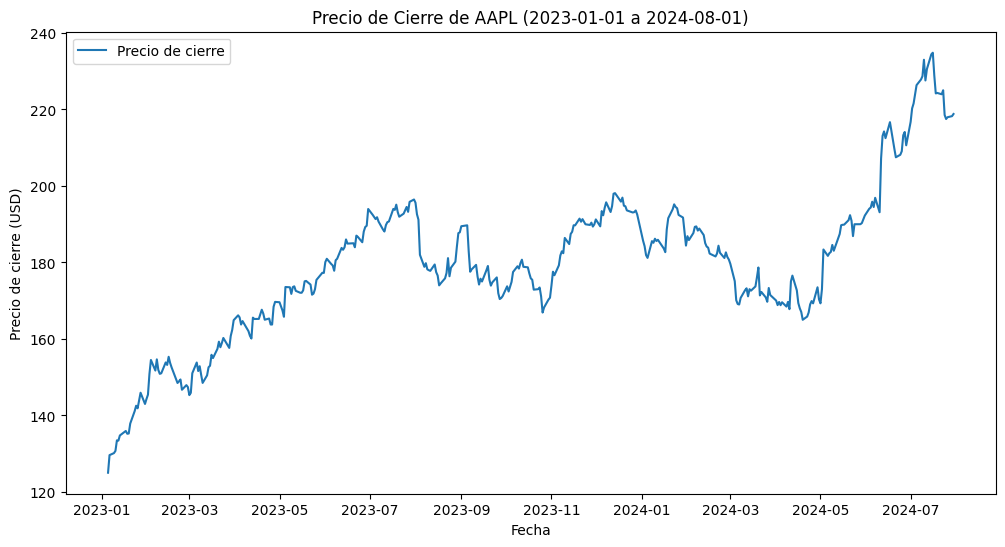

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Descargar datos
data = yf.download('AAPL', start='2023-01-01', end='2024-08-01')
data.index = data.index.tz_convert(None)

# Calcular derivadas y retorno
data['Primera Derivada'] = data['Close'].diff()
data['Segunda Derivada'] = data['Close'].diff().diff()
data['Retorno Simple'] = data['Close'].pct_change(fill_method=None)

# Limpiar datos
data.dropna(inplace=True)

# Escalar las características
scaler = MinMaxScaler()
features = data[['Primera Derivada', 'Segunda Derivada', 'Retorno Simple']].values
features_scaled = scaler.fit_transform(features)

# Objetivo: predicción del precio de cierre siguiente día
data['Close_shifted'] = data['Close'].shift(-1)
data.dropna(inplace=True)  # Eliminar la última fila que tiene NaN después de shift
target = data['Close_shifted'].values

# Asegurarse de que las características están alineadas con el objetivo
features_scaled = features_scaled[:len(target)]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Precio de cierre")
plt.title("Precio de Cierre de AAPL (2023-01-01 a 2024-08-01)")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.legend()
plt.show()


Este código analiza datos financieros de Apple (AAPL) y los prepara para predecir el precio de cierre del día siguiente. Primero, descarga datos históricos (2023-2024) usando `yfinance`. Calcula características derivadas del precio de cierre: **primera derivada** (cambio diario), **segunda derivada** (aceleración del cambio) y **retorno simple** (cambio porcentual diario). Se eliminan filas con valores faltantes y las características se escalan al rango [0, 1] con `MinMaxScaler`.

El objetivo (`target`) se define como el precio de cierre del siguiente día (`Close_shifted`), y las filas finales se eliminan para alinear las características con el objetivo. Luego, los datos se dividen en conjuntos de entrenamiento y prueba con un 80%-20% usando `train_test_split`.

Finalmente, se genera una gráfica para visualizar la evolución del precio de cierre durante el período analizado. Este preprocesamiento deja los datos listos para aplicar modelos de predicción.

#<font color = "Green">$Definición$ $y$ $Entrenamiento$ $del$ $Modelo$

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
modelo = Sequential([
    Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(32, activation='relu'),
    Dense(1)  # Salida continua para regresión
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='mean_squared_error',  # Para regresión
    metrics=['mae']  # Error absoluto medio
)

# Entrenar el modelo
history = modelo.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 32616.1074 - mae: 179.8132 - val_loss: 32385.0840 - val_mae: 178.9334
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32622.4785 - mae: 179.5459 - val_loss: 32226.0957 - val_mae: 178.4906
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32087.9648 - mae: 178.1613 - val_loss: 31994.1074 - val_mae: 177.8421
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31823.4531 - mae: 177.5674 - val_loss: 31623.0957 - val_mae: 176.7998
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31886.4883 - mae: 177.5436 - val_loss: 31040.2930 - val_mae: 175.1496
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30740.6602 - mae: 174.3760 - val_loss: 30185.4023 - val_mae: 172.6994
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29423.4238 - mae: 170.4789 - val_loss: 28985.1523 - val_mae: 169.1978
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29080.2559 - mae: 169.5461 - val_loss: 27383.8672 - val

Este código implementa y entrena una red neuronal para un problema de regresión usando TensorFlow y Keras. El modelo tiene tres capas densas:
- Una capa de entrada con 64 neuronas (activación `ReLU`),
- Una capa oculta con 32 neuronas (`ReLU`),
- Una capa de salida con 1 neurona (para regresión).

Se compila con el optimizador `adam`, la función de pérdida `mean_squared_error` (MSE) y la métrica `mae`. Luego, se entrena con `X_train` y `y_train` durante 50 épocas, con lotes de tamaño 16 y un 20% de los datos reservado para validación. Este modelo está diseñado para predecir valores continuos optimizando el error cuadrático medio.

#<font color = "Green">$Evaluación$ $del$ $Modelo$

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1112.0310 - mae: 24.7478 
MAE en el conjunto de prueba: 25.27


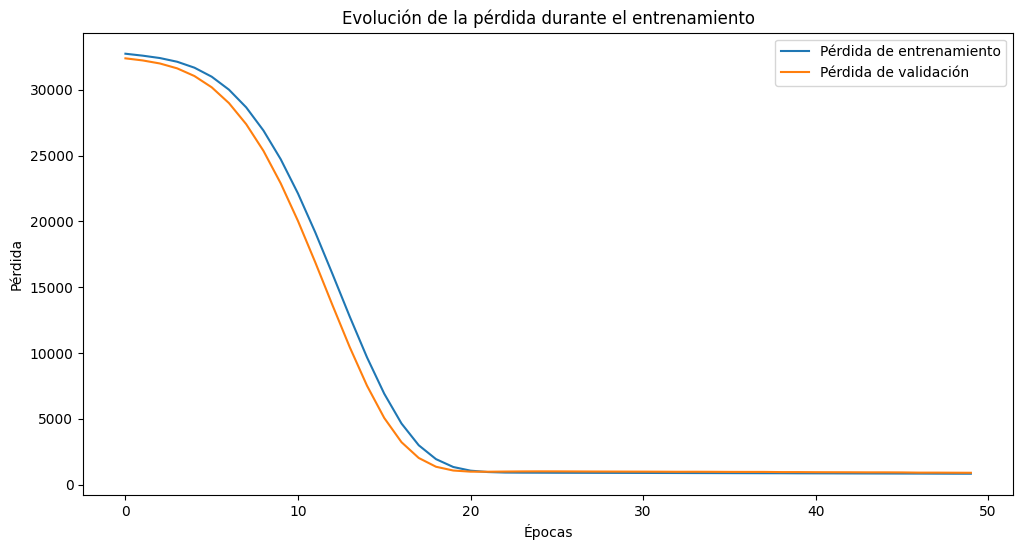

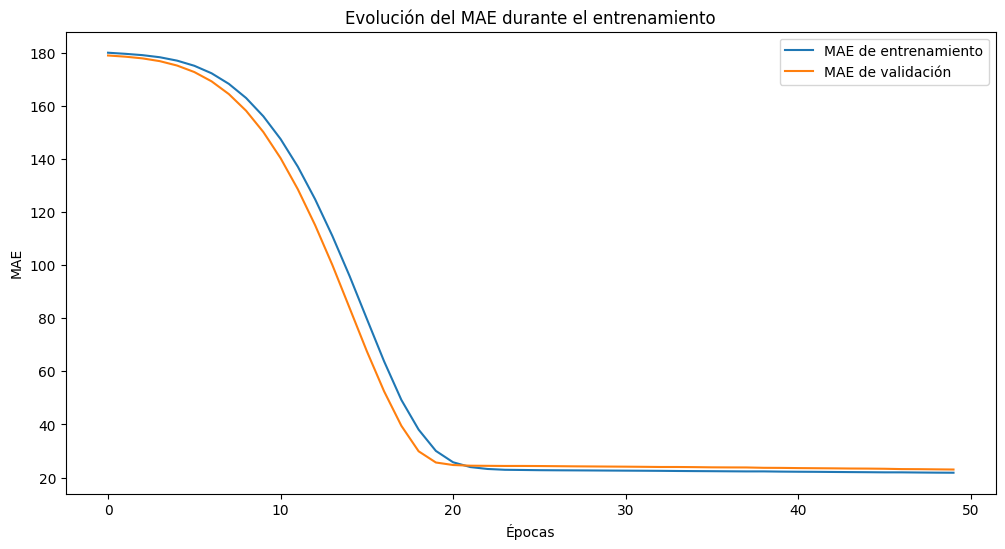

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, mae = modelo.evaluate(X_test, y_test)
print(f"MAE en el conjunto de prueba: {mae:.2f}")

# Graficar la pérdida de entrenamiento y validación
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar el MAE de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.title('Evolución del MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()




Este código evalúa el modelo en el conjunto de prueba y visualiza su desempeño durante el entrenamiento. Calcula la pérdida (`loss`) y el MAE en los datos de prueba (`X_test`, `y_test`) e imprime el MAE para medir la precisión del modelo. Además, genera dos gráficos que muestran:

1. La evolución de la pérdida (entrenamiento y validación) para detectar problemas como sobreajuste.
2. La evolución del MAE (entrenamiento y validación) para observar cómo mejora la precisión del modelo en las predicciones.

Esto permite evaluar y analizar tanto el ajuste del modelo como su rendimiento en datos nuevos.

#<font color = "Green">$Predicción$ $y$ $Visualización$

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[*********************100%***********************]  1 of 1 completed


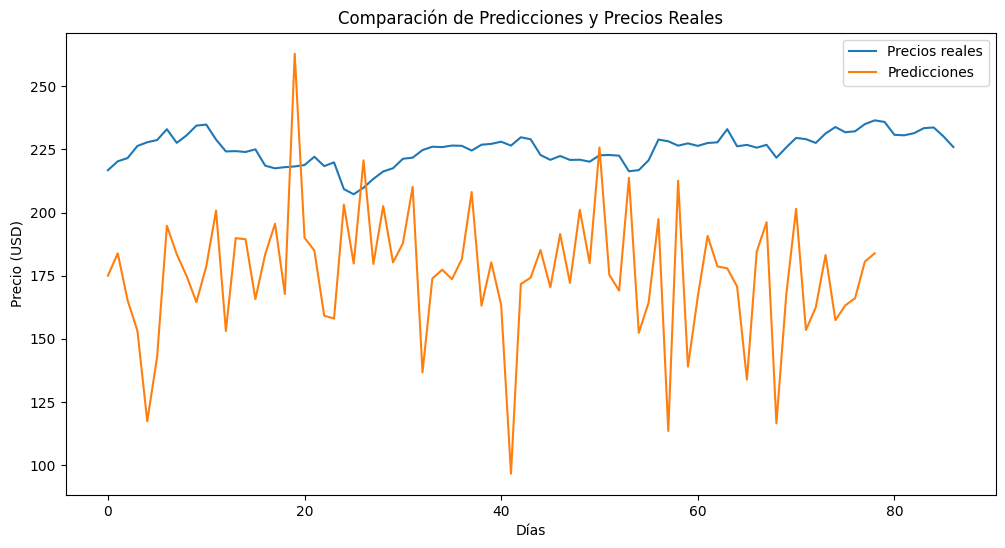

In [ ]:
# Desescalar las predicciones
predicciones = modelo.predict(X_test)

# Comparar con precios reales
real_data = yf.download('AAPL', start='2024-07-01', end='2024-11-01')
real_prices = real_data['Close'].values

plt.figure(figsize=(12, 6))
plt.plot(range(len(real_prices)), real_prices, label='Precios reales')
plt.plot(range(len(predicciones)), predicciones, label='Predicciones')
plt.title('Comparación de Predicciones y Precios Reales')
plt.xlabel('Días')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

Este código compara las predicciones del modelo con los precios reales de AAPL (julio-noviembre 2024). Usa `X_test` para generar predicciones y descarga los precios reales con `yfinance`. Luego, grafica ambos conjuntos para visualizar cómo se ajustan las predicciones a los datos reales, evaluando así el desempeño del modelo.

No funciona. Los datos a comparacion de los reales son muy distorcionados

#OTRA FORMA:

#NUEVO ENFOQUE: Clasificación de Subidas y Bajadas

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Descargar datos
data = yf.download('AAPL', start='2020-01-01', end='2024-08-01')
data.index = data.index.tz_convert(None)

# Calcular media móvil y retorno
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['Retorno Simple'] = data['Close'].pct_change()

# Limpiar datos
data.dropna(inplace=True)

# Crear la etiqueta binaria: 1 si el precio sube, 0 si baja
data['Label'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Escalar las características
scaler = MinMaxScaler()
features = data[['SMA_10', 'Retorno Simple']].values
features_scaled = scaler.fit_transform(features)

# Asegurarse de que las características están alineadas con el objetivo
features_scaled = features_scaled[:-1]
labels = data['Label'].values[:-1]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


[*********************100%***********************]  1 of 1 completed

Tamaño del conjunto de entrenamiento: 913
Tamaño del conjunto de prueba: 229


Este código prepara datos de AAPL (2020-2024) para un modelo de clasificación que predice si el precio subirá o bajará al día siguiente. Calcula la media móvil de 10 días y el retorno simple como características, y crea una etiqueta binaria (1 para subida, 0 para bajada) como objetivo. Luego, escala las características y divide los datos en conjuntos de entrenamiento (80%) y prueba (20%) para entrenar y evaluar el modelo.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir el modelo
modelo = Sequential([
    Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Activación sigmoid para clasificación binaria
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = modelo.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5418 - loss: 0.6893 - val_accuracy: 0.4262 - val_loss: 0.7153
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5597 - loss: 0.6870 - val_accuracy: 0.4262 - val_loss: 0.7170
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5451 - loss: 0.6912 - val_accuracy: 0.4262 - val_loss: 0.7205
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5626 - loss: 0.6877 - val_accuracy: 0.4262 - val_loss: 0.7213
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5378 - loss: 0.6920 - val_accuracy: 0.4262 - val_loss: 0.7260
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5617 - loss: 0.6849 - val_accuracy: 0.4262 - val_loss: 0.7211
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5435 - loss: 0.6896 - val_accuracy: 0.4262 - val_loss: 0.7222
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5898 - loss: 0.6766 - val_accuracy: 0.4262 - val_loss: 0.7208
Epo

Este código define y entrena una red neuronal para clasificación binaria usando TensorFlow y Keras. El modelo tiene dos capas densas con activación `ReLU` y una capa de salida con activación `sigmoid` para predecir valores entre 0 y 1. Utiliza `Dropout` para prevenir sobreajuste. Se compila con el optimizador `adam` y la pérdida `binary_crossentropy`. El entrenamiento se realiza durante 50 épocas con validación del 20% de los datos.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

# Graficar la pérdida de entrenamiento y validación
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Evolución de la precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


NameError: name 'modelo' is not defined

Este código evalúa el modelo en el conjunto de prueba y calcula su precisión, imprimiéndola como un porcentaje. Además, genera dos gráficas: una que muestra la evolución de la pérdida durante el entrenamiento y validación, y otra que muestra la evolución de la precisión. Esto permite visualizar el desempeño del modelo a lo largo de las épocas.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


[*********************100%***********************]  1 of 1 completed


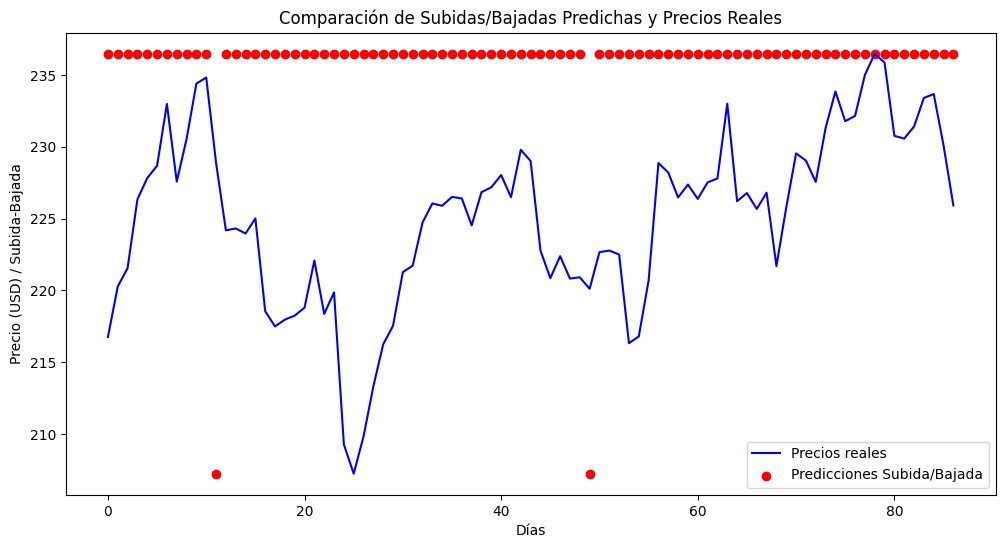

In [ ]:
# Hacer predicciones
predicciones = (modelo.predict(X_test) > 0.5).astype(int).flatten()

# Descargar datos reales para el mismo periodo que las predicciones
real_data = yf.download('AAPL', start='2024-07-01', end='2024-11-01')
real_prices = real_data['Close'].values

# Alinear el tamaño de las predicciones con los precios reales
predicciones = predicciones[:len(real_prices)]

# Crear un DataFrame para visualizar la tendencia de subida/bajada
# The error is here because real_prices is 2-dimensional
# We use .flatten() to convert it to 1-dimensional
results = pd.DataFrame({
    'Real Prices': real_prices[:len(predicciones)].flatten(),  # Changed to flatten real_prices
    'Predicciones': predicciones
})

# Escalar las predicciones a la misma altura que los precios reales para visualización clara
predicciones_escaladas = results['Predicciones'] * (results['Real Prices'].max() - results['Real Prices'].min()) + results['Real Prices'].min()

# Graficar las predicciones frente a los precios reales
plt.figure(figsize=(12, 6))
plt.plot(results['Real Prices'], label='Precios reales', color='blue')
plt.scatter(results.index, predicciones_escaladas, label='Predicciones Subida/Bajada', color='red', marker='o')
plt.title('Comparación de Subidas/Bajadas Predichas y Precios Reales')
plt.xlabel('Días')
plt.ylabel('Precio (USD) / Subida-Bajada')
plt.legend()
plt.show()

Este código realiza predicciones sobre si el precio de AAPL subirá o bajará y las compara con los precios reales. Las predicciones se ajustan y escalan para alinearse con los precios reales, y luego se visualizan en un gráfico, mostrando las predicciones de subida/bajada como puntos rojos junto a los precios reales.

#<font color = "Green">$Conclusiones$

El modelo que utilizamos no funcionó adecuadamente porque las variables empleadas para hacer las predicciones eran demasiado limitadas para capturar la complejidad del comportamiento del mercado de acciones. Predecir el precio de las acciones es un desafío, ya que está influenciado por una amplia gama de factores, como noticias económicas, cambios en la política monetaria, eventos globales, sentimiento del mercado, y más. Además, el comportamiento de los precios de las acciones puede ser altamente volátil y no siempre sigue patrones predecibles con base en un número reducido de variables.

#<font color = "Green">$Material$ $de$ $Apoyo$

https://www.youtube.com/watch?v=5nRYIPCUYTA (min 2:54) 🤯

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb?hl=es-419

https://youtu.be/iX_on3VxZzk?si=A4mJm4iKpLSy_OW9


fe